In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
C = 1e-7 # mu0/(4 pi)
I = 1 # current

def b_field(r, dr, P):
    d = P - r[:-1]
    nd = np.linalg.norm(d, axis=1)

    v = np.cross(dr, d)

    dB = C*I / nd[:, np.newaxis]**3 * v
    return dB.sum(axis=0)


## Coil

In [143]:
a = 1 # loop radius
n = 10 # number of turns
L = 1 # width

In [144]:
N = 10000 # number of segment
dph = n * 2*np.pi/N
dL = L/N

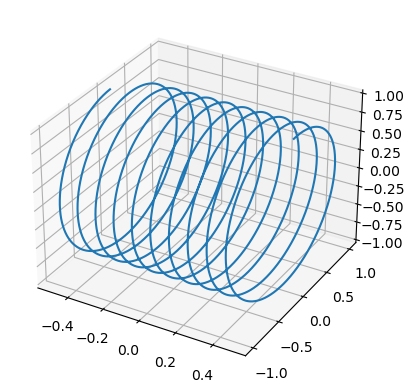

In [145]:
r = np.array([[-L/2+i*dL, -a*np.sin(i*dph), a*np.cos(i*dph)] for i in range(N+1)])
dr = np.diff(r, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(r[:, 0], r[:, 1], r[:, 2])
plt.show()

In [135]:
P = np.array([0, 0, 0])

Bx, By, Bz = b_field(r, dr, P)

In [129]:
Bx_th = 4e-7*np.pi*n*I/np.sqrt(4*a*a+L*L)
print(f'{Bx = }, {Bx_th = }, Bx:Bx_th = {Bx/Bx_th}')

Bx = 3.0477925508735954e-07, Bx_th = 3.0477925513918096e-07, Bx:Bx_th = 0.9999999998299707


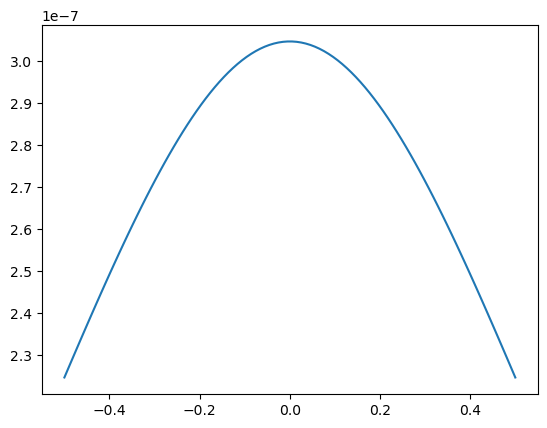

In [130]:
N_points = 100
xmin = -a/2
xmax = +a/2
Bx = np.zeros(N_points)
x = np.linspace(xmin, xmax, N_points)

for i in range(N_points):
    Bx[[i]] = b_field(r, dr, np.array([x[i], 0, 0]))[[0]]

plt.plot(x, Bx)
plt.show()

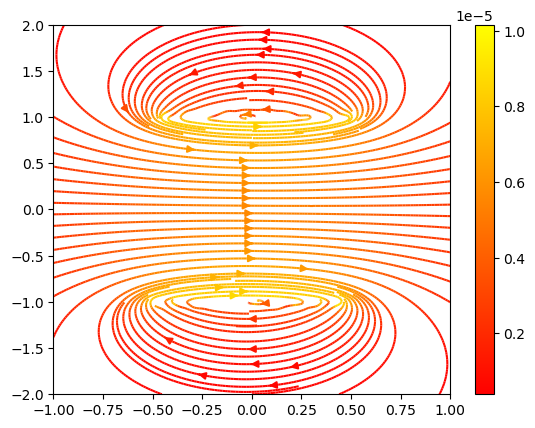

In [148]:
N_plot = 50
x = np.linspace(-L, L, N_plot)
y = np.linspace(-2*a, 2*a, N_plot)
grid = np.array([np.zeros(N_plot), y])

Bx = np.zeros([N_plot, N_plot])
By = np.zeros([N_plot, N_plot])
Bz = np.zeros([N_plot, N_plot])
Bmag = np.zeros([N_plot, N_plot])

for i in range(N_plot):
    for j in range(N_plot):
        P = np.array([x[j], y[i], 0])
        Bx[i, j] = b_field(r, dr, P)[0]
        By[i, j] = b_field(r, dr, P)[1]
        Bz[i, j] = b_field(r, dr, P)[2]
        Bmag[i, j] = np.sqrt(Bx[i, j]*Bx[i, j]+By[i, j]*By[i, j]+Bz[i, j]*Bz[i, j])


        # nxy = np.sqrt(bx*bx+by*by)

        # Bx[i, j] = bx/nxy
        # By[i, j] = by/nxy

fig, ax = plt.subplots()
strm = ax.streamplot(x, y, Bx, By, start_points=grid.T, density=5, color=Bmag, cmap='autumn')
fig.colorbar(strm.lines)

plt.show()


In [14]:
L = 2*np.pi*a*np.array([0, 1, 0])
F = I * np.cross(L, b_field(r, dr, P))
F

array([ 3.86449865e-07,  0.00000000e+00, -1.91498454e-06])

## Straight Wire

In [84]:
N = 1000 # number of segment
L = 1000
dL = L/N

In [85]:
r = np.array([[0, 0, -L/2+i*dL] for i in range(N+1)])
dr = np.diff(r, axis=0)


In [86]:
P = np.array([0, 0.001, 0])

B = b_field(r, dr, P)

### Force

In [87]:
L2 = 1
dL2 = L2/N
d = 1
r2 = np.array([[d, 0, -L2/2+i*dL2] for i in  range(N+1)])
dr2 = np.diff(r2, axis=0)

F = np.zeros(3)

for i in range(N):
    F += I * np.cross(b_field(r, dr, r2[i]), dr2[i])

F

array([1.999996e-07, 0.000000e+00, 0.000000e+00])

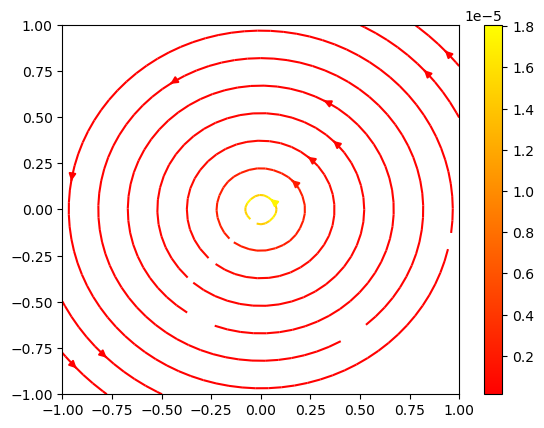

In [124]:
N_plot = 20
x = np.linspace(-1, 1, N_plot)
y = np.linspace(-1, 1, N_plot)
grid = np.array([x, y])

Bx = np.zeros([N_plot, N_plot])
By = np.zeros([N_plot, N_plot])
Bz = np.zeros([N_plot, N_plot])
Bmag = np.zeros([N_plot, N_plot])

for i in range(N_plot):
    for j in range(N_plot):
        P = np.array([x[j], y[i], 0])
        Bx[i, j] = b_field(r, dr, P)[0]
        By[i, j] = b_field(r, dr, P)[1]
        Bz[i, j] = b_field(r, dr, P)[2]
        Bmag[i, j] = np.sqrt(Bx[i, j]*Bx[i, j]+By[i, j]*By[i, j]+Bz[i, j]*Bz[i, j])


        # nxy = np.sqrt(bx*bx+by*by)

        # Bx[i, j] = bx/nxy
        # By[i, j] = by/nxy

fig, ax = plt.subplots()
strm = ax.streamplot(x, y, Bx, By, start_points=grid.T, color=Bmag, cmap='autumn')
fig.colorbar(strm.lines)

plt.show()


In [123]:
grid.T

array([[-1.        , -1.        ],
       [-0.77777778, -0.77777778],
       [-0.55555556, -0.55555556],
       [-0.33333333, -0.33333333],
       [-0.11111111, -0.11111111],
       [ 0.11111111,  0.11111111],
       [ 0.33333333,  0.33333333],
       [ 0.55555556,  0.55555556],
       [ 0.77777778,  0.77777778],
       [ 1.        ,  1.        ]])